In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
import numpy as np
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor as vif
from sklearn.metrics import roc_curve, auc
df = pd.read_csv('bank-additional-full.csv', sep=';') # https://www.kaggle.com/datasets/sahistapatel96/bankadditionalfullcsv
pd.options.display.max_columns = None

df

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,261,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,149,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,226,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,151,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,307,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,retired,married,professional.course,no,yes,no,cellular,nov,fri,334,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41184,46,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,383,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41185,56,retired,married,university.degree,no,yes,no,cellular,nov,fri,189,2,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41186,44,technician,married,professional.course,no,no,no,cellular,nov,fri,442,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes


Аналитика

══════════════════════════════════════════════════
1. АНАЛИЗ ЦЕЛЕВОЙ ПЕРЕМЕННОЙ (poutcome)
══════════════════════════════════════════════════
Распределение значений:
poutcome
nonexistent    86.343110
failure        10.323395
success         3.333495
Name: proportion, dtype: float64


<Figure size 1200x600 with 0 Axes>

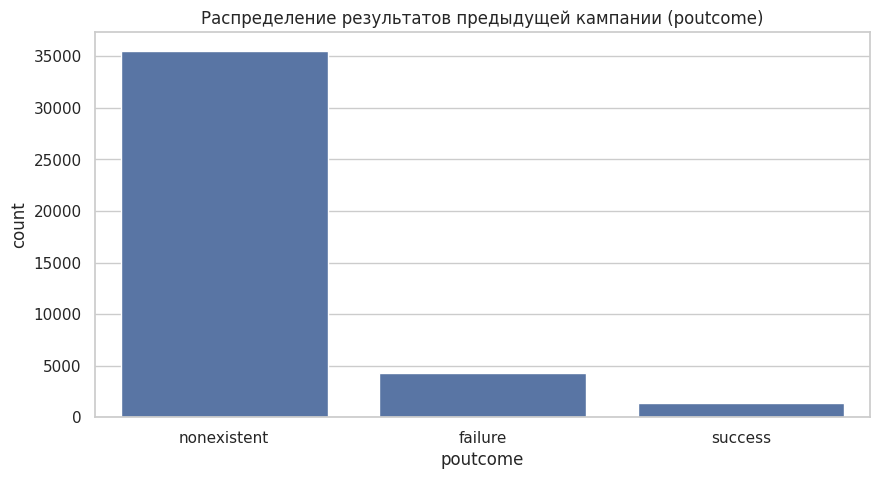


══════════════════════════════════════════════════
2. СВЯЗЬ POUTCOME С ЧИСЛОВЫМИ ПЕРЕМЕННЫМИ
══════════════════════════════════════════════════


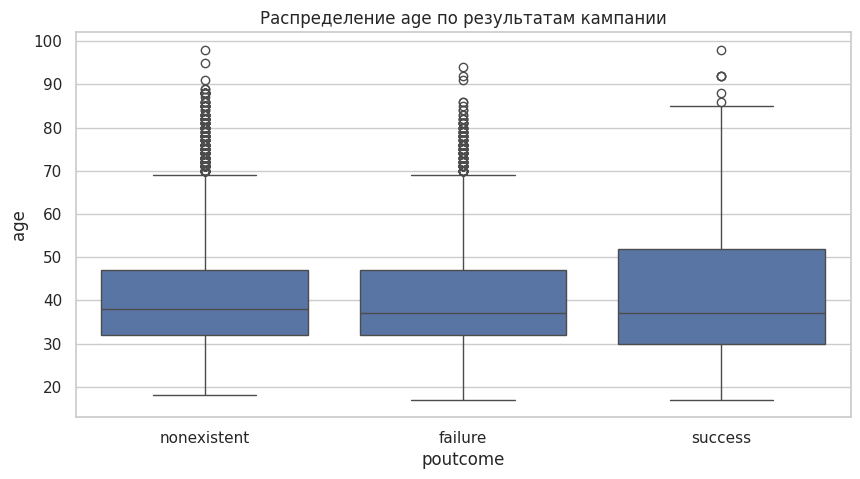

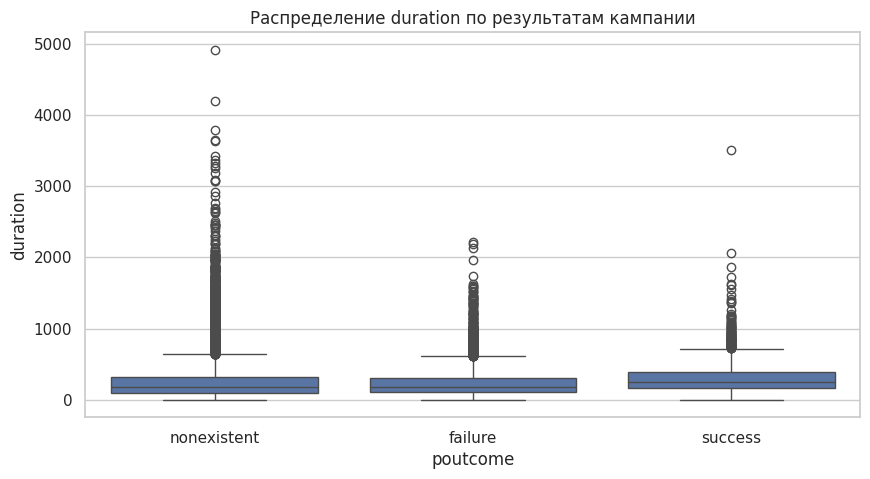

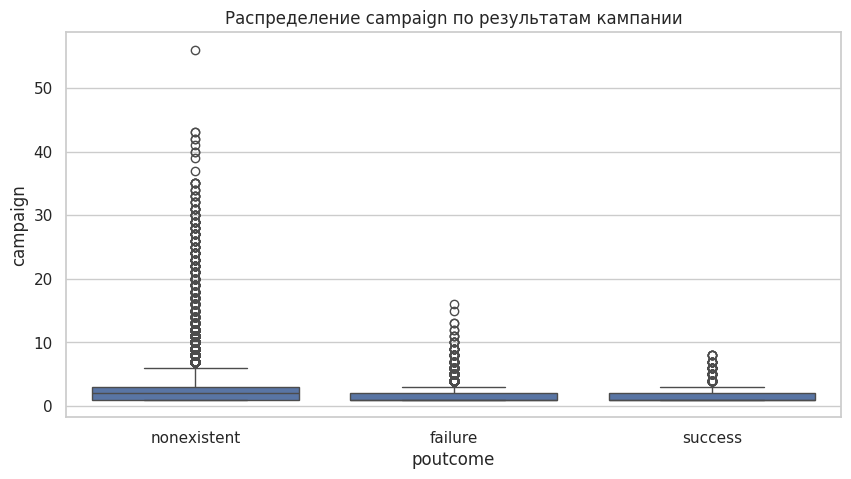

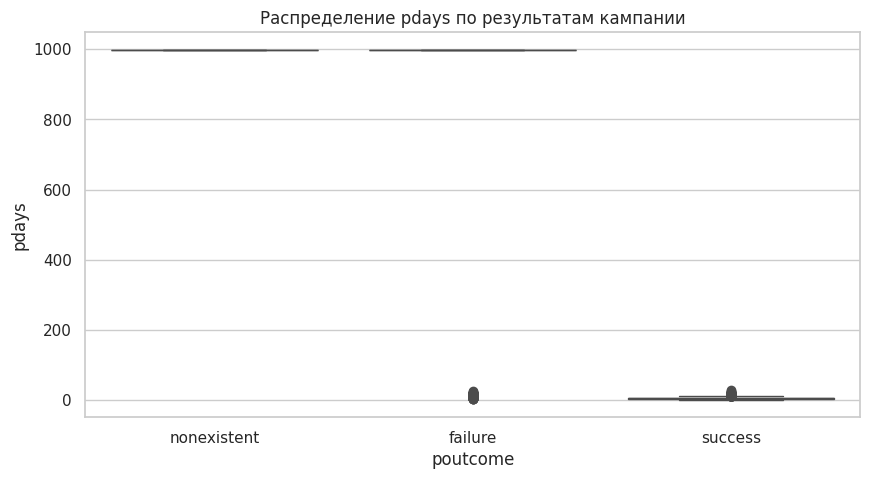

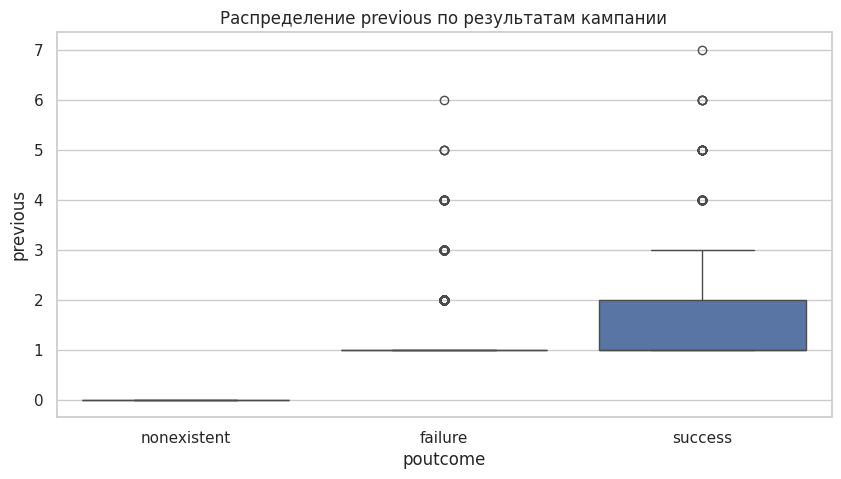

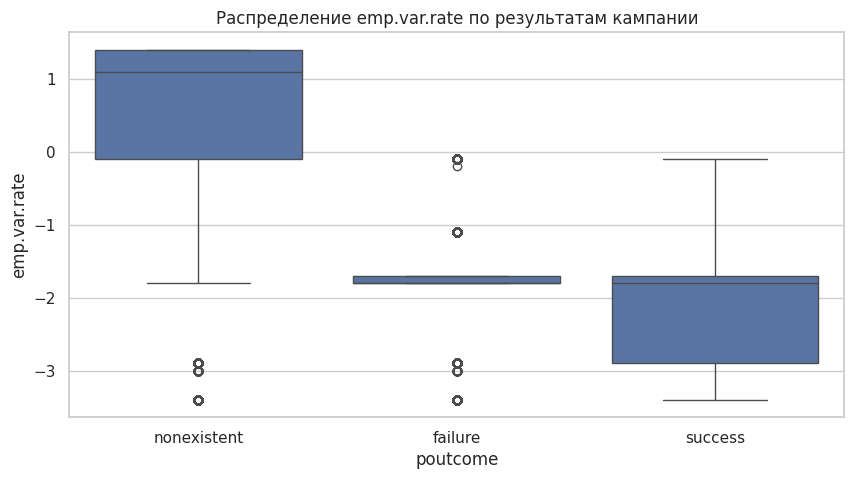

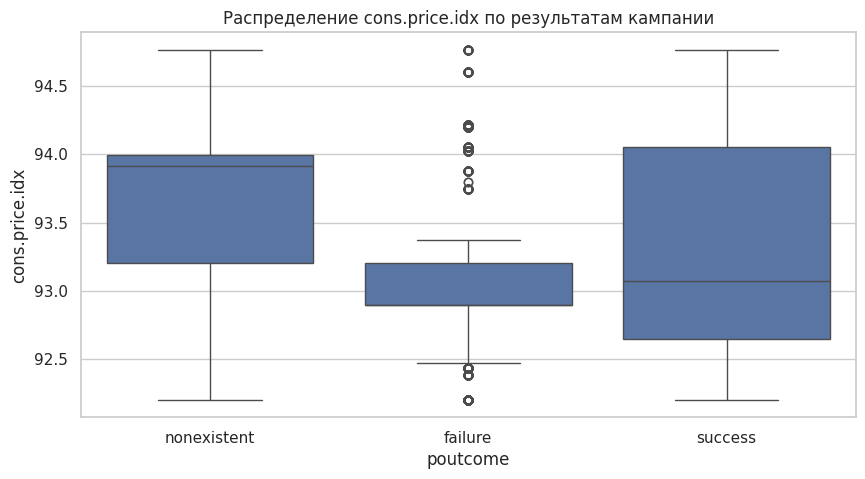

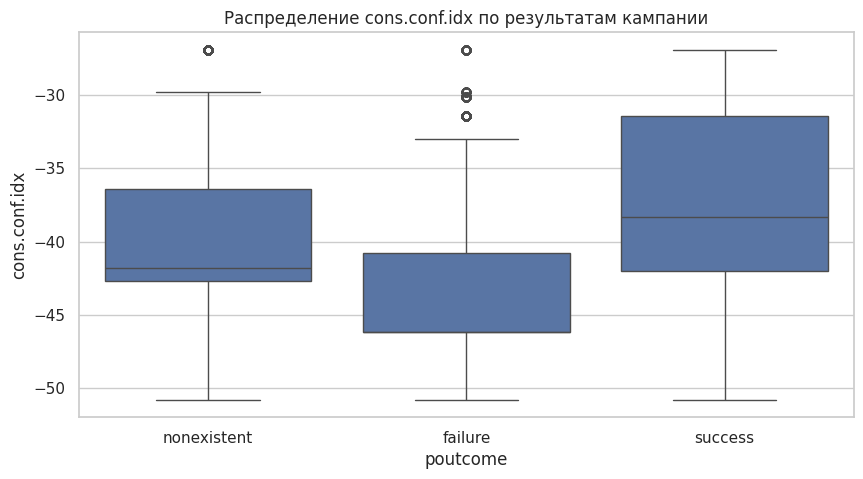

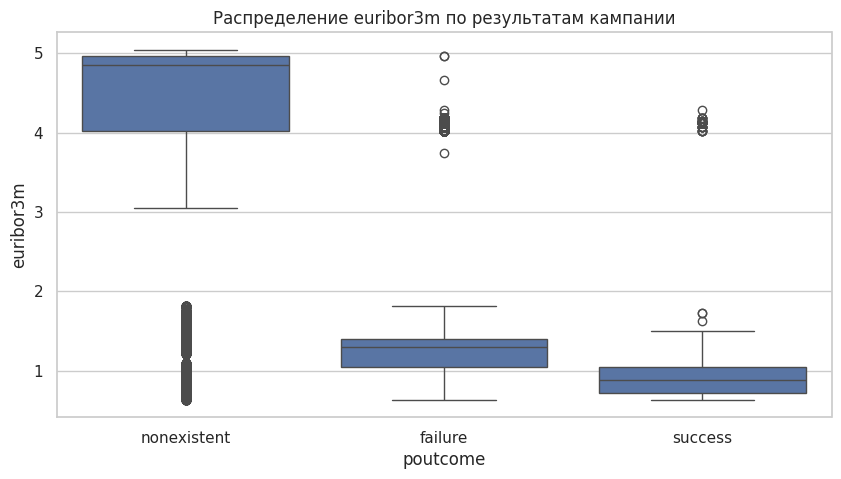

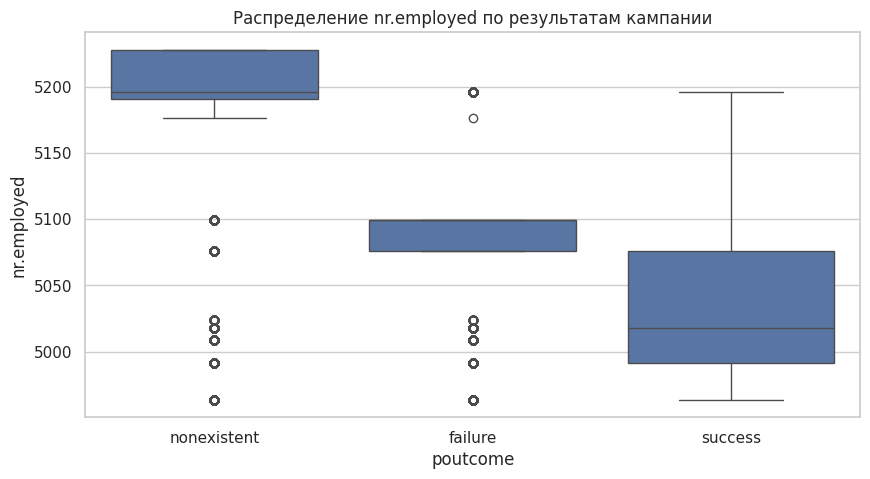


══════════════════════════════════════════════════
3. СВЯЗЬ POUTCOME С КАТЕГОРИАЛЬНЫМИ ПЕРЕМЕННЫМИ
══════════════════════════════════════════════════


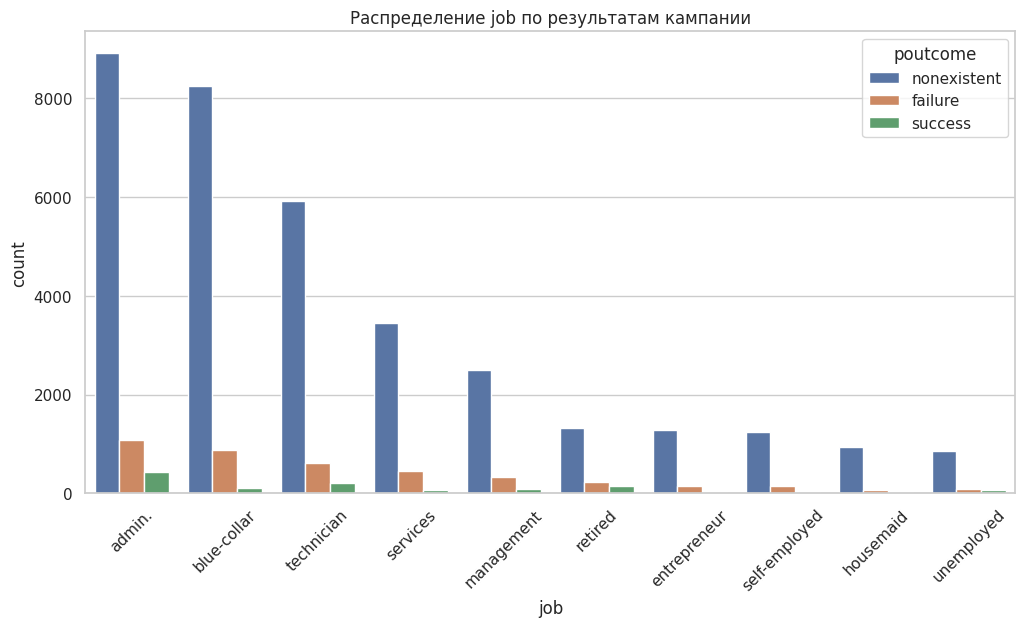

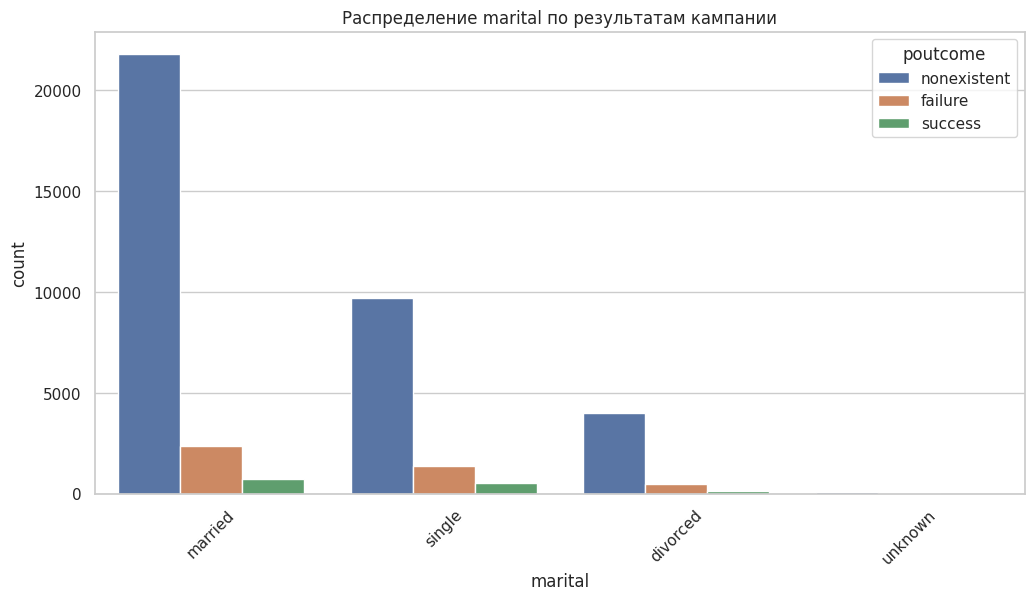

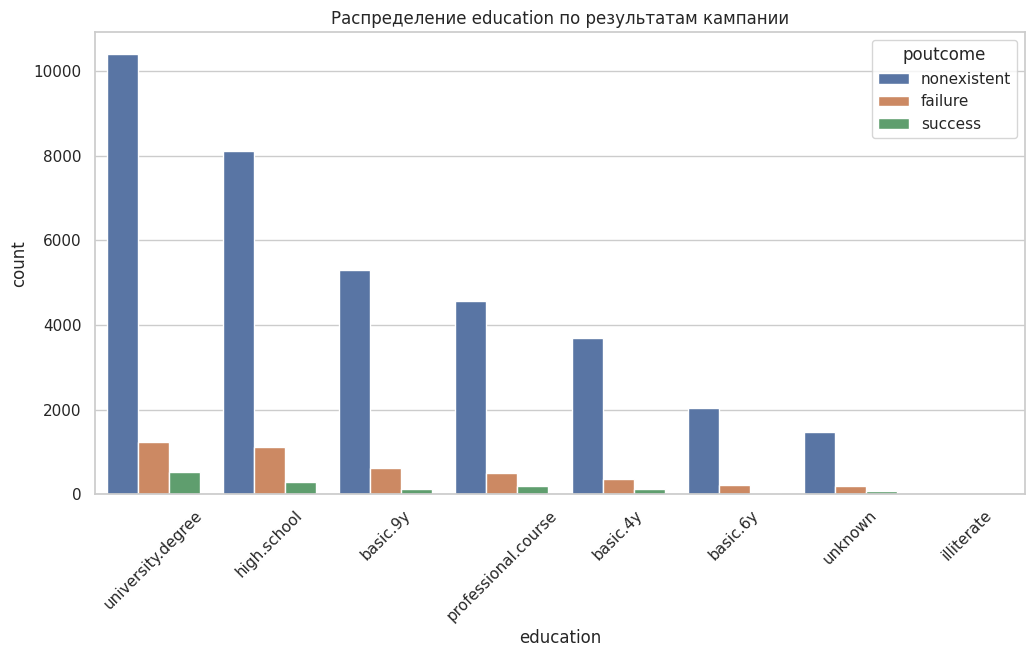

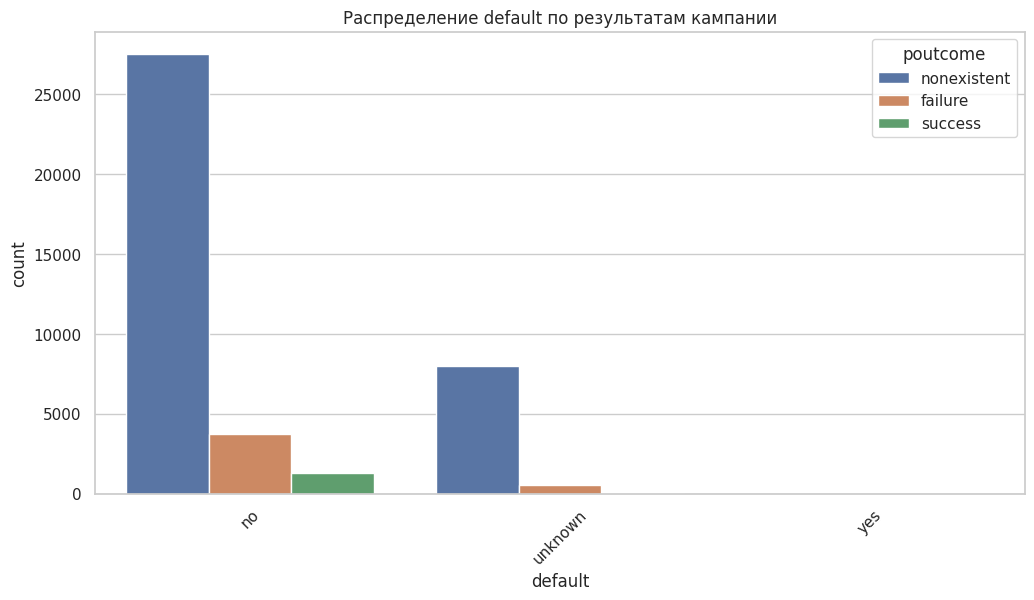

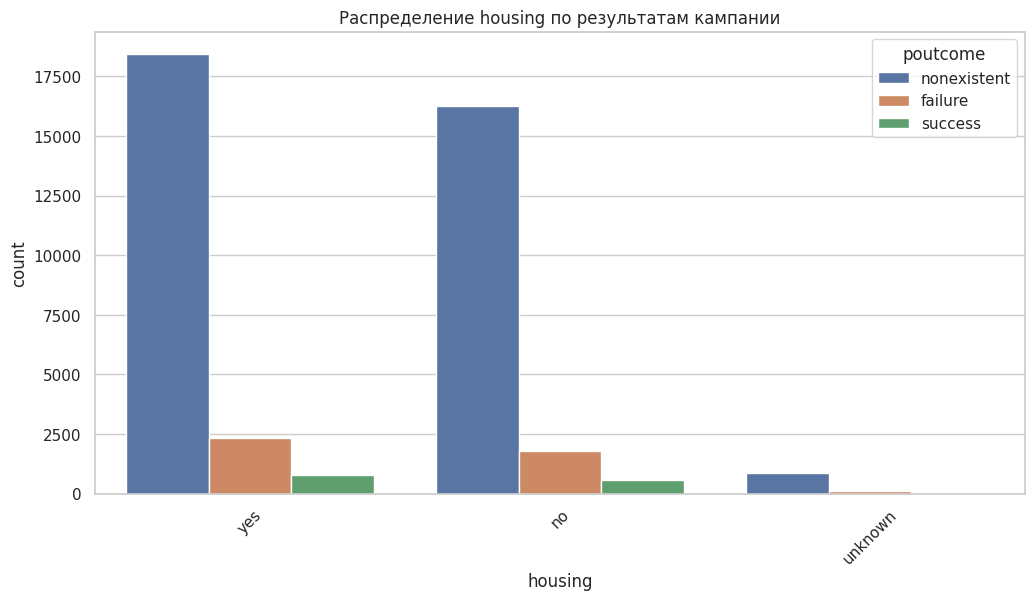

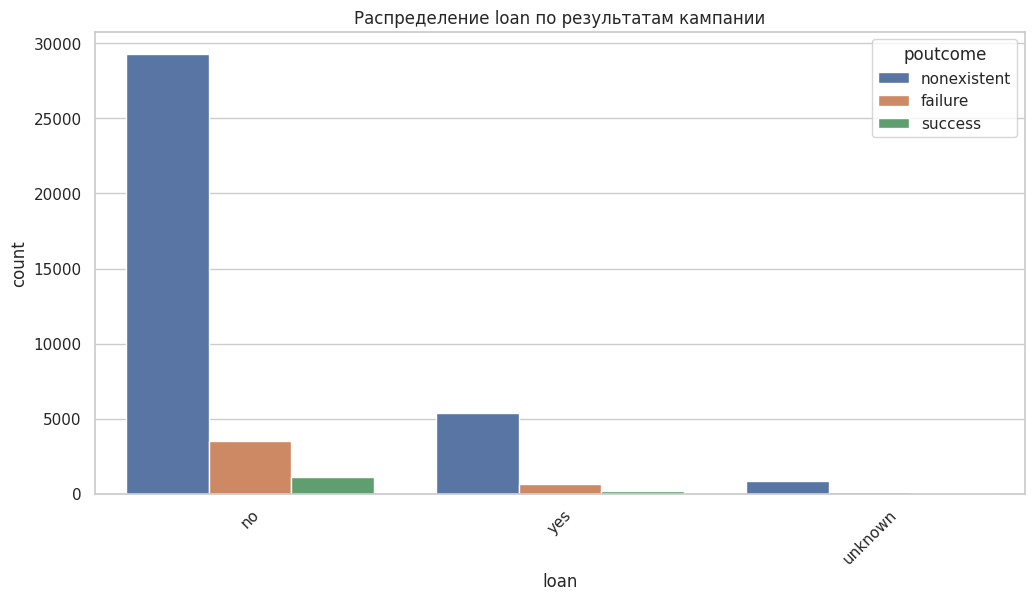

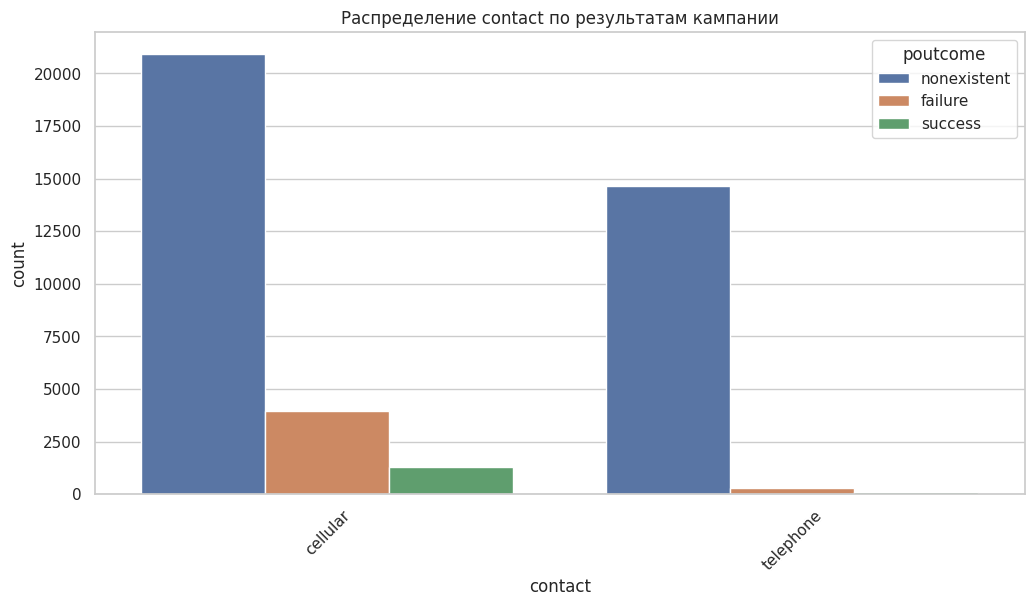

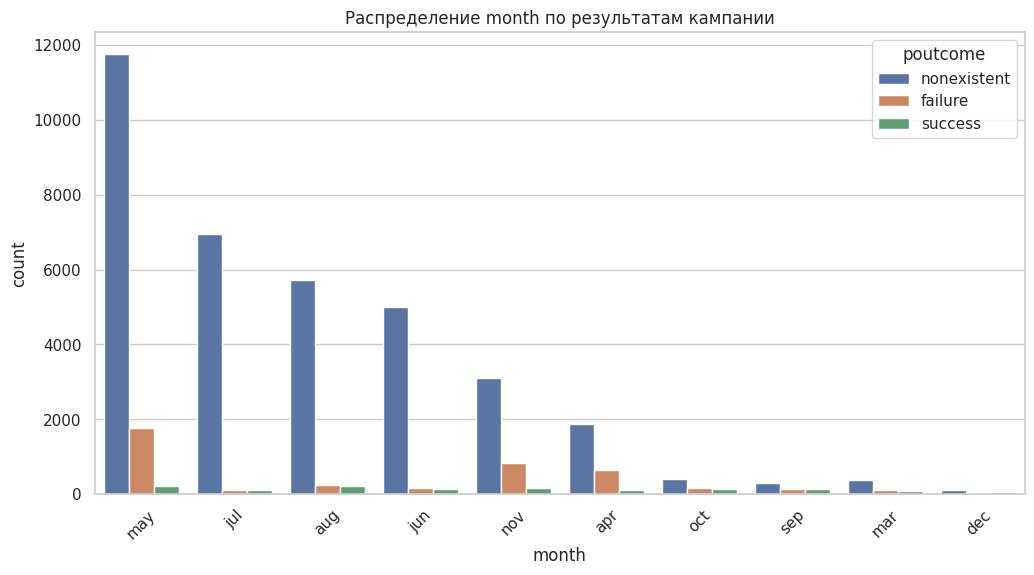

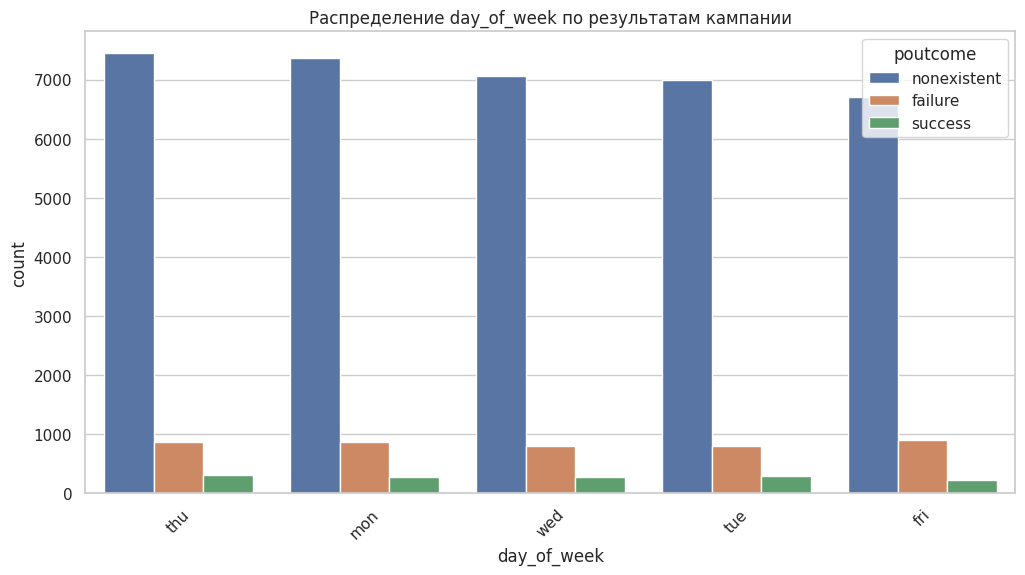


══════════════════════════════════════════════════
4. СТАТИСТИЧЕСКИЙ АНАЛИЗ СВЯЗЕЙ
══════════════════════════════════════════════════

ANOVA тесты для числовых переменных:
age: F=26.17, p=0.0000
duration: F=43.84, p=0.0000
campaign: F=162.07, p=0.0000
pdays: F=200141.74, p=0.0000
previous: F=76902.71, p=0.0000
emp.var.rate: F=5976.38, p=0.0000
cons.price.idx: F=2235.35, p=0.0000
cons.conf.idx: F=681.19, p=0.0000
euribor3m: F=6579.02, p=0.0000
nr.employed: F=7296.83, p=0.0000

Хи-квадрат тесты для категориальных переменных:
job: χ²=838.48, p=0.0000
marital: χ²=116.53, p=0.0000
education: χ²=161.26, p=0.0000
default: χ²=487.68, p=0.0000
housing: χ²=27.69, p=0.0000
loan: χ²=1.60, p=0.8092
contact: χ²=2422.43, p=0.0000
month: χ²=4858.01, p=0.0000
day_of_week: χ²=25.51, p=0.0013

══════════════════════════════════════════════════
5. ВРЕМЕННОЙ АНАЛИЗ
══════════════════════════════════════════════════


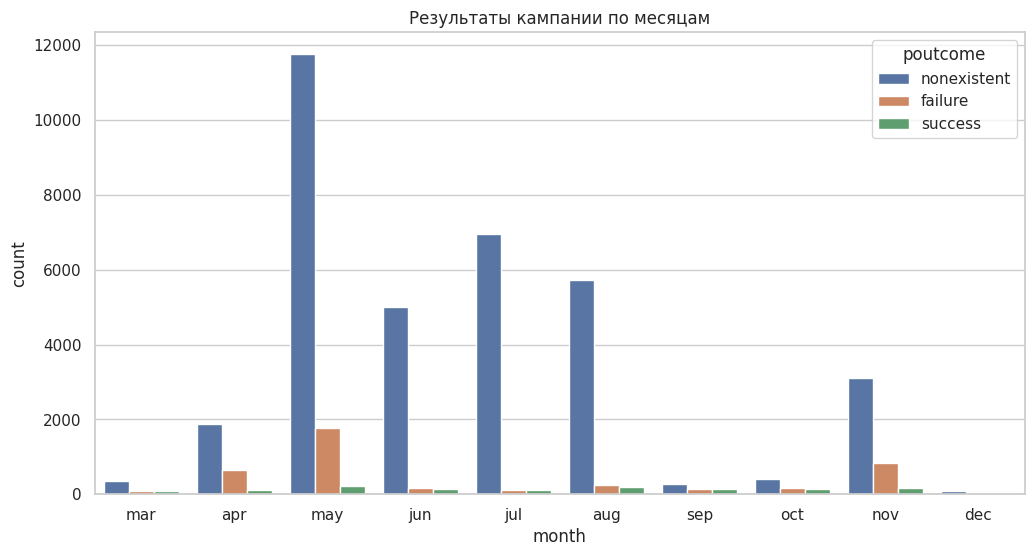

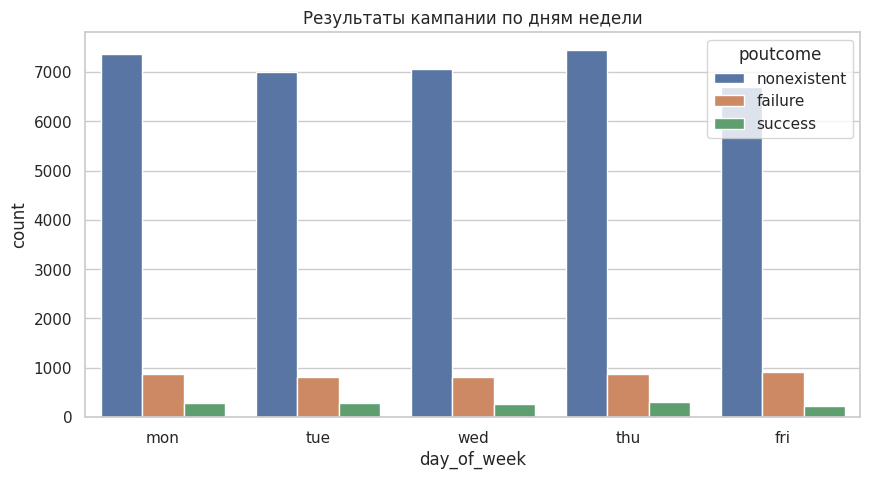


══════════════════════════════════════════════════
6. АНАЛИЗ УСПЕШНЫХ КЕЙСОВ (success)
══════════════════════════════════════════════════
Количество успешных случаев: 1373 (3.33%)

Средние значения для успешных случаев:
age                 42.023307
duration           320.941733
campaign             1.808449
pdays                5.587764
previous             1.569556
emp.var.rate        -2.091260
cons.price.idx      93.334355
cons.conf.idx      -38.388565
euribor3m            0.996563
nr.employed       5030.622433
dtype: float64

Частые характеристики успешных клиентов:

job:
job
admin.        31.172615
technician    15.367808
retired       11.507647
Name: proportion, dtype: float64

marital:
marital
married     52.658412
single      37.581937
divorced     9.395484
Name: proportion, dtype: float64

education:
education
university.degree      38.820102
high.school            21.412964
professional.course    13.328478
Name: proportion, dtype: float64

contact:
contact
cellular     92.49

In [7]:

pd.set_option('display.max_columns', None)
pd.set_option('display.width', 1000)
sns.set(style="whitegrid")
plt.figure(figsize=(12, 6))

print("═"*50)
print("1. АНАЛИЗ ЦЕЛЕВОЙ ПЕРЕМЕННОЙ (poutcome)")
print("═"*50)
print("Распределение значений:")
print(df['poutcome'].value_counts(normalize=True)*100)


plt.figure(figsize=(10, 5))
sns.countplot(data=df, x='poutcome', order=df['poutcome'].value_counts().index)
plt.title('Распределение результатов предыдущей кампании (poutcome)')
plt.show()

num_cols = df.select_dtypes(include=['int64', 'float64']).columns
print("\n" + "═"*50)
print("2. СВЯЗЬ POUTCOME С ЧИСЛОВЫМИ ПЕРЕМЕННЫМИ")
print("═"*50)

for col in num_cols:
    plt.figure(figsize=(10, 5))
    sns.boxplot(data=df, x='poutcome', y=col)
    plt.title(f'Распределение {col} по результатам кампании')
    plt.show()

cat_cols = df.select_dtypes(include=['object']).drop(columns=['y']).columns
print("\n" + "═"*50)
print("3. СВЯЗЬ POUTCOME С КАТЕГОРИАЛЬНЫМИ ПЕРЕМЕННЫМИ")
print("═"*50)

for col in cat_cols:
    if col != 'poutcome':
        plt.figure(figsize=(12, 6))
        sns.countplot(data=df, x=col, hue='poutcome',
                     order=df[col].value_counts().iloc[:10].index)
        plt.title(f'Распределение {col} по результатам кампании')
        plt.xticks(rotation=45)
        plt.legend(title='poutcome')
        plt.show()

# Статистический анализ
print("\n" + "═"*50)
print("4. СТАТИСТИЧЕСКИЙ АНАЛИЗ СВЯЗЕЙ")
print("═"*50)

# Тест ANOVA для числовых переменных
print("\nANOVA тесты для числовых переменных:")
for col in num_cols:
    groups = [df[df['poutcome']==cat][col] for cat in df['poutcome'].unique()]
    f_stat, p_val = stats.f_oneway(*groups)
    print(f"{col}: F={f_stat:.2f}, p={p_val:.4f}")

# Хи-квадрат для категориальных переменных
print("\nХи-квадрат тесты для категориальных переменных:")
for col in cat_cols:
    if col != 'poutcome':
        contingency_table = pd.crosstab(df[col], df['poutcome'])
        chi2, p, dof, expected = chi2_contingency(contingency_table)
        print(f"{col}: χ²={chi2:.2f}, p={p:.4f}")

# 5. Анализ временных параметров
print("\n" + "═"*50)
print("5. ВРЕМЕННОЙ АНАЛИЗ")
print("═"*50)

# Распределение по месяцам
plt.figure(figsize=(12, 6))
sns.countplot(data=df, x='month', hue='poutcome',
             order=['mar', 'apr', 'may', 'jun', 'jul', 'aug', 'sep', 'oct', 'nov', 'dec'])
plt.title('Результаты кампании по месяцам')
plt.show()

# Распределение по дням недели
plt.figure(figsize=(10, 5))
sns.countplot(data=df, x='day_of_week', hue='poutcome',
             order=['mon', 'tue', 'wed', 'thu', 'fri'])
plt.title('Результаты кампании по дням недели')
plt.show()

# Анализ успешных случаев (success)
print("\n" + "═"*50)
print("6. АНАЛИЗ УСПЕШНЫХ КЕЙСОВ (success)")
print("═"*50)
success_data = df[df['poutcome'] == 'success']
print(f"Количество успешных случаев: {len(success_data)} ({len(success_data)/len(df)*100:.2f}%)")

# Характеристики успешных случаев
print("\nСредние значения для успешных случаев:")
print(success_data[num_cols].mean())

# Профиль успешного клиента
print("\nЧастые характеристики успешных клиентов:")
for col in ['job', 'marital', 'education', 'contact']:
    print(f"\n{col}:")
    print(success_data[col].value_counts(normalize=True).head(3)*100)

In [ ]:
# Пример замены значений в DataFrame
df['education'] = df['education'].replace({
    'university.degree': 'higher',
    'professional.course': 'higher',
    'high.school': 'secondary',
    'basic.9y': 'secondary',
    'basic.6y': 'secondary',  # или 'low' в альтернативном варианте
    'basic.4y': 'low',
    'illiterate': 'low',
    'unknown': 'low'
})

In [ ]:
df['education'].value_counts() #need optimization

,count
education,
secondary,17852
higher,17411
low,5925


In [ ]:
# Define the job grouping mapping
job_groups = {
    'office_workers': ['admin.', 'management'],
    'manual_labor': ['blue-collar', 'housemaid'],
    'tech_related': ['technician', 'self-employed', 'entrepreneur'],
    'service_sector': ['services'],
    'inactive': ['retired', 'unemployed', 'student'],
    'other': ['unknown']
}

# Reverse the mapping to create a dictionary for replacement
group_mapping = {}
for group, jobs in job_groups.items():
    for job in jobs:
        group_mapping[job] = group

# Apply the mapping to create a new column
df['job'] = df['job'].map(group_mapping)
df['job'].value_counts()


,count
job,
office_workers,13346
manual_labor,10314
tech_related,9620
service_sector,3969
inactive,3609
other,330


In [ ]:
df.drop(df[df['default'] == 'unknown'].index, inplace=True)
df['default'] = df['default'].map({'no': 0.0, 'yes': 1.0})

In [ ]:
# Step 1: Drop unknown marital status rows
df = df[df['marital'] != 'unknown'].copy()

# Step 2: Create optimized column
df['marital'] = df['marital'].map({
    'single': 'single',
    'married': 'in_relationship',
    'divorced': 'single'  # assuming divorced people were previously in relationships
})



In [ ]:
df['marital'].value_counts()

,count
marital,
in_relationship,18658
single,13864


In [ ]:
df.drop(df[df['loan'] == 'unknown'].index, inplace=True)

In [ ]:
df['housing'] = df['housing'].map({'no': 0.0, 'yes': 1.0})
df

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,manual_labor,in_relationship,low,0.0,0.0,no,telephone,may,mon,261,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,service_sector,in_relationship,secondary,0.0,1.0,no,telephone,may,mon,226,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,office_workers,in_relationship,secondary,0.0,0.0,no,telephone,may,mon,151,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,service_sector,in_relationship,secondary,0.0,0.0,yes,telephone,may,mon,307,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
6,59,office_workers,in_relationship,higher,0.0,0.0,no,telephone,may,mon,139,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,inactive,in_relationship,higher,0.0,1.0,no,cellular,nov,fri,334,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41184,46,manual_labor,in_relationship,higher,0.0,0.0,no,cellular,nov,fri,383,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41185,56,inactive,in_relationship,higher,0.0,1.0,no,cellular,nov,fri,189,2,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41186,44,tech_related,in_relationship,higher,0.0,0.0,no,cellular,nov,fri,442,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes


In [ ]:
df['campaign'] = df['campaign'].apply(lambda x: 0 if x == 1 else 1)

In [ ]:
df['campaign'].value_counts()

,count
campaign,
0,2498
1,2408


In [ ]:
df.drop(df[df['poutcome'] == 'nonexistent'].index, inplace=True)

In [ ]:
#Create dummy-variables 1
Edu_dummy=pd.get_dummies(df['education'], prefix='', prefix_sep='_')
Edu_dummy.head()
# illiterate = ref.group.

,_higher,_low,_secondary
24013,False,True,False
24019,False,False,True
24076,True,False,False
24102,False,False,True
24108,True,False,False


In [ ]:
#Create dummy-variables 2
Work_dummy=pd.get_dummies(df['job'], prefix='', prefix_sep='_')
Work_dummy.head()


,_inactive,_manual_labor,_office_workers,_other,_service_sector,_tech_related
24013,False,True,False,False,False,False
24019,False,False,False,False,True,False
24076,False,False,True,False,False,False
24102,False,False,True,False,False,False
24108,False,False,True,False,False,False


In [ ]:
df['poutcome'] = df['poutcome'].map({'failure': 0.0, 'success': 1.0})

In [ ]:
df['marital'] = df['marital'].map({'single': 0.0, 'in_relationship': 1.0})

In [ ]:
df['loan'] = df['loan'].map({'no': 0.0, 'yes': 1.0})

In [ ]:
df

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y,_inactive,_manual_labor,_office_workers,_other,_service_sector,_tech_related,_higher,_low,_secondary
24013,38,manual_labor,0.0,low,0.0,1.0,0.0,telephone,oct,tue,39,1,999,1,0.0,-0.1,93.798,-40.4,4.968,5195.8,no,False,True,False,False,False,False,False,True,False
24019,40,service_sector,1.0,secondary,0.0,1.0,0.0,telephone,oct,tue,144,1,999,1,0.0,-0.1,93.798,-40.4,4.968,5195.8,yes,False,False,False,False,True,False,False,False,True
24076,36,office_workers,1.0,higher,0.0,1.0,0.0,telephone,nov,wed,449,1,999,1,0.0,-0.1,93.200,-42.0,4.663,5195.8,no,False,False,True,False,False,False,True,False,False
24102,36,office_workers,1.0,secondary,0.0,1.0,0.0,telephone,nov,wed,114,1,999,1,0.0,-0.1,93.200,-42.0,4.286,5195.8,yes,False,False,True,False,False,False,False,False,True
24108,37,office_workers,1.0,higher,0.0,1.0,0.0,telephone,nov,wed,119,1,6,1,1.0,-0.1,93.200,-42.0,4.286,5195.8,no,False,False,True,False,False,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41174,62,inactive,1.0,higher,0.0,1.0,0.0,cellular,nov,thu,208,1,1,6,1.0,-1.1,94.767,-50.8,1.031,4963.6,yes,True,False,False,False,False,False,True,False,False
41175,34,inactive,0.0,low,0.0,1.0,0.0,cellular,nov,thu,180,1,999,2,0.0,-1.1,94.767,-50.8,1.031,4963.6,no,True,False,False,False,False,False,False,True,False
41178,62,inactive,1.0,higher,0.0,0.0,0.0,cellular,nov,thu,483,2,6,3,1.0,-1.1,94.767,-50.8,1.031,4963.6,yes,True,False,False,False,False,False,True,False,False
41182,29,inactive,0.0,low,0.0,1.0,0.0,cellular,nov,fri,112,1,9,1,1.0,-1.1,94.767,-50.8,1.028,4963.6,no,True,False,False,False,False,False,False,True,False


In [ ]:
df = pd.concat([df, Work_dummy, Edu_dummy], axis=1)

In [ ]:
df_model = df.dropna(subset=['age','marital','housing','loan'
                              ,'_manual_labor',	'_office_workers',	'_other',	'_service_sector',	'_tech_related',
                                        '_higher',	'_secondary','poutcome', 'duration',	'campaign'])
df_model.shape



# I am not going to add '_admin.' and '_blue-collar' jobs in model because they cause multicollinearity problem at the end!!!



(4906, 30)

In [ ]:
x_mult = df_model[['age','marital','housing','loan'
                              ,'_manual_labor',	'_office_workers',	'_other',	'_service_sector',	'_tech_related',
                                        '_higher',	'_secondary', 'duration',	'campaign']]
y = df_model['poutcome']
x_mult_constant = sm.add_constant(x_mult)

In [ ]:
model = sm.Logit(y.astype(float), x_mult_constant.astype(float)).fit()
print(model.summary())

Optimization terminated successfully.
         Current function value: 0.542802
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:               poutcome   No. Observations:                 4906
Model:                          Logit   Df Residuals:                     4892
Method:                           MLE   Df Model:                           13
Date:                Sat, 07 Jun 2025   Pseudo R-squ.:                 0.05505
Time:                        11:54:22   Log-Likelihood:                -2663.0
converged:                       True   LL-Null:                       -2818.1
Covariance Type:            nonrobust   LLR p-value:                 1.687e-58
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
const              -0.5967      0.190     -3.141      0.002      -0.969      -0.224
age           

In [ ]:
model = sm.Logit(y.astype(float), x_mult_constant.astype(float)).fit()
print(model.summary())

Optimization terminated successfully.
         Current function value: 0.542802
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:               poutcome   No. Observations:                 4906
Model:                          Logit   Df Residuals:                     4892
Method:                           MLE   Df Model:                           13
Date:                Sat, 07 Jun 2025   Pseudo R-squ.:                 0.05505
Time:                        11:54:26   Log-Likelihood:                -2663.0
converged:                       True   LL-Null:                       -2818.1
Covariance Type:            nonrobust   LLR p-value:                 1.687e-58
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
const              -0.5967      0.190     -3.141      0.002      -0.969      -0.224
age           

In [ ]:
coefs = pd.DataFrame()
coefs['Coefs'] = model.params[1:]
coefs['Features'] = model.params.index[1:]
coefs.set_index('Features', inplace=True)
print('Intercept = ', model.params[0])
coefs
#regression coefficients

Intercept =  -0.5966618821024089


<ipython-input-178-82811356d3fe>:5: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print('Intercept = ', model.params[0])


,Coefs
Features,
age,0.003522
marital,-0.062738
housing,-0.012009
loan,-0.051724
_manual_labor,-1.264712
_office_workers,-0.715902
_other,0.495192
_service_sector,-1.262892
_tech_related,-0.984845


In [ ]:
coefs['OddsRatio'] = np.exp(coefs.Coefs)
coefs
#regression coefficient and odds ratio

,Coefs,OddsRatio
Features,,
age,0.003522,1.003528
marital,-0.062738,0.939190
housing,-0.012009,0.988062
loan,-0.051724,0.949591
_manual_labor,-1.264712,0.282321
_office_workers,-0.715902,0.488751
_other,0.495192,1.640813
_service_sector,-1.262892,0.282835
_tech_related,-0.984845,0.373497


In [ ]:
def yes_no(p_value, level = 0.05):
    if abs(p_value) < level:
        return 'significant'
    else:
        return 'non-significant'
pvals = pd.DataFrame()
pvals['p_values'] = model.pvalues[1:]
pvals['5% level']= pvals['p_values'].apply(yes_no)
pvals['p_values'] = pvals['p_values'].map('{:.3f}'.format)
pvals['Features'] = model.params.index[1:]
pvals.set_index('Features',inplace=True)
pvals


#I want to generate the table in a more convienent way to see what is significant and not.

,p_values,5% level
Features,,
age,0.221,non-significant
marital,0.394,non-significant
housing,0.860,non-significant
loan,0.579,non-significant
_manual_labor,0.000,significant
_office_workers,0.000,significant
_other,0.193,non-significant
_service_sector,0.000,significant
_tech_related,0.000,significant


In [ ]:
pvals['10% level'] = model.pvalues[1:].apply(lambda x: yes_no(x, level=0.1))
pvals

#I want to generate the table in a more convienent way to see what is significant and not.
#But with the increased level of importance.


,p_values,5% level,10% level
Features,,,
age,0.221,non-significant,non-significant
marital,0.394,non-significant,non-significant
housing,0.860,non-significant,non-significant
loan,0.579,non-significant,non-significant
_manual_labor,0.000,significant,significant
_office_workers,0.000,significant,significant
_other,0.193,non-significant,non-significant
_service_sector,0.000,significant,significant
_tech_related,0.000,significant,significant


I want to characterize the model.

In [ ]:
print('R^2 = {:f}'.format(model.prsquared))
print('Model significance = {:f}'.format(model.llr_pvalue))
# significant as <0.05 but it explains only 15% of variation.

R^2 = 0.055052
Model significance = 0.000000


In [ ]:
f'Statistically significant model parameters: {model.pvalues[model.pvalues < 0.05].index.values}'

"Statistically significant model parameters: ['const' '_manual_labor' '_office_workers' '_service_sector'\n '_tech_related' '_secondary' 'duration']"

In [ ]:
f'Statistically nonsignificant model parameters: {model.pvalues[model.pvalues > 0.05].index.values}'

"Statistically nonsignificant model parameters: ['age' 'marital' 'housing' 'loan' '_other' '_higher' 'campaign']"

In [ ]:
l = []
for (param, index) in zip(model.params[1:], model.params.index[1:]):
    l.append('{:.2f}*{}'.format(param, index))

print('logit(p) = {:2f} + {}'.format(model.params[0], ' + '.join(l)))


# I want to specify the regression equation



logit(p) = -0.596662 + 0.00*age + -0.06*marital + -0.01*housing + -0.05*loan + -1.26*_manual_labor + -0.72*_office_workers + 0.50*_other + -1.26*_service_sector + -0.98*_tech_related + 0.12*_higher + -0.30*_secondary + 0.00*duration + -0.07*campaign


<ipython-input-185-cbb8b0eba4b6>:5: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print('logit(p) = {:2f} + {}'.format(model.params[0], ' + '.join(l)))


In [ ]:
cm = model.pred_table()
print('TP: {} | FN: {}\n-------------------\nFP: {}  | TN: {}'.format(cm[0,0], cm[0,1], cm[1,0], cm[1,1]))

TP: 3531.0 | FN: 93.0
-------------------
FP: 1197.0  | TN: 85.0


In [ ]:
accuracy = (cm[0,0] + cm[1,1]) / sum(sum(cm))
print('Accuracy: {}'.format(accuracy))

Accuracy: 0.7370566653077864


The accuracy is 89% this is not very high but also nut very low. We are supposed to have predicted 89% of cases.

In [ ]:
df_model['poutcome'] = [int(i) for i in df_model['poutcome']] #I want to align all Y-s otherwise I cannot make a graph.
fpr, tpr, _ = roc_curve(df_model['poutcome'], model.predict())
roc_auc = auc(fpr, tpr)

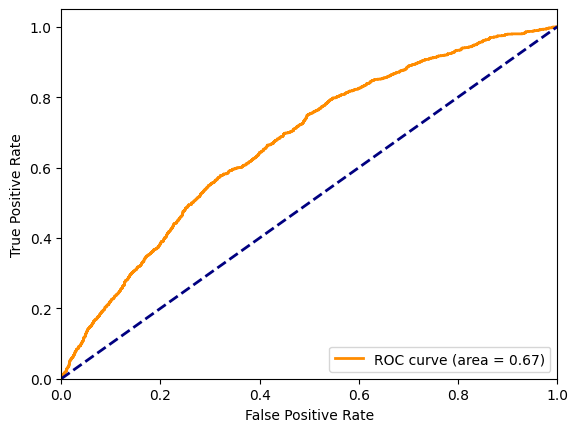

In [ ]:
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='lower right')
plt.show()

S=76 square units out of 100.

In [ ]:
#Diagnostics - I want to consider the residuals

p = stats.kstest(model.resid_generalized, 'norm', args=(model.resid_generalized.mean(), model.resid_generalized.std())).pvalue
print('P-value: {:.3f}'.format(p))

P-value: 0.000


<ipython-input-191-35515334cbfe>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(model.resid_generalized, fit=stats.norm)


<Axes: ylabel='Density'>

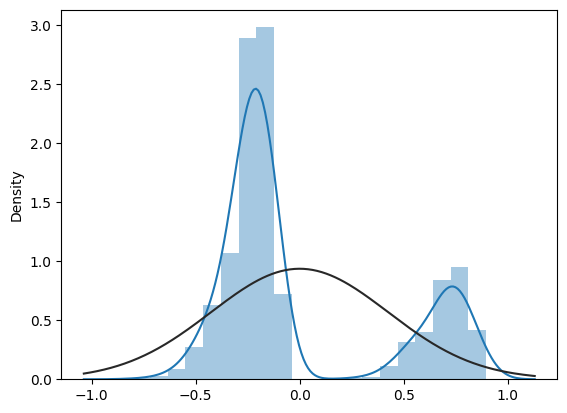

In [ ]:
# P-value <0.05 inducates a different from normal distribution.

sns.distplot(model.resid_generalized, fit=stats.norm)

In [ ]:
#Diagnostics - I want to consider the multicollinearity

vifs = np.array([vif(model.model.exog, i) for i in range(model.model.exog.shape[1])])

In [ ]:
vif_df = pd.DataFrame()
vif_df['VIF'] = vifs[1:]
vif_df['Features'] = model.params.index[1:]
vif_df.sort_values(by=['VIF'])

,VIF,Features
3,1.002829,loan
2,1.003335,housing
11,1.004338,duration
12,1.005164,campaign
6,1.036998,_other
1,1.178514,marital
0,1.310187,age
7,1.611548,_service_sector
4,1.958769,_manual_labor
8,2.248323,_tech_related


I want to ensure that there is no multicollinearity problem.

As all VIFs do not exceed 10, indeed there is no multicollinearity problem.

In [ ]:
# I want to save the probability for each case in the table.

df_model['probability'] = model.predict()
df_model

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y,_inactive,_manual_labor,_office_workers,_other,_service_sector,_tech_related,_higher,_low,_secondary,probability
24013,38,manual_labor,0.0,low,0.0,1.0,0.0,telephone,oct,tue,39,0,999,1,0,-0.1,93.798,-40.4,4.968,5195.8,no,False,True,False,False,False,False,False,True,False,0.155045
24019,40,service_sector,1.0,secondary,0.0,1.0,0.0,telephone,oct,tue,144,0,999,1,0,-0.1,93.798,-40.4,4.968,5195.8,yes,False,False,False,False,True,False,False,False,True,0.126419
24076,36,office_workers,1.0,higher,0.0,1.0,0.0,telephone,nov,wed,449,0,999,1,0,-0.1,93.200,-42.0,4.663,5195.8,no,False,False,True,False,False,False,True,False,False,0.346690
24102,36,office_workers,1.0,secondary,0.0,1.0,0.0,telephone,nov,wed,114,0,999,1,0,-0.1,93.200,-42.0,4.286,5195.8,yes,False,False,True,False,False,False,False,False,True,0.192486
24108,37,office_workers,1.0,higher,0.0,1.0,0.0,telephone,nov,wed,119,0,6,1,1,-0.1,93.200,-42.0,4.286,5195.8,no,False,False,True,False,False,False,True,False,False,0.268476
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41174,62,inactive,1.0,higher,0.0,1.0,0.0,cellular,nov,thu,208,0,1,6,1,-1.1,94.767,-50.8,1.031,4963.6,yes,True,False,False,False,False,False,True,False,False,0.475513
41175,34,inactive,0.0,low,0.0,1.0,0.0,cellular,nov,thu,180,0,999,2,0,-1.1,94.767,-50.8,1.031,4963.6,no,True,False,False,False,False,False,False,True,False,0.429012
41178,62,inactive,1.0,higher,0.0,0.0,0.0,cellular,nov,thu,483,1,6,3,1,-1.1,94.767,-50.8,1.031,4963.6,yes,True,False,False,False,False,False,True,False,False,0.537586
41182,29,inactive,0.0,low,0.0,1.0,0.0,cellular,nov,fri,112,0,9,1,1,-1.1,94.767,-50.8,1.028,4963.6,no,True,False,False,False,False,False,False,True,False,0.406078
